In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [7]:
dataset_path = '/Users/kartiksharma/Desktop/Pest and Disease/Dataset'

train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')

# Change this code

In [8]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial blight_cassava': 1, 'brown spot_cassava': 2, 'fall armyworm_maize': 3, 'grasshoper_maize': 4, 'green mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf beetle_maize': 11, 'leaf blight_maize': 12, 'leaf blight_tomato': 13, 'leaf curl_tomato': 14, 'leaf miner_cashew': 15, 'leaf spot_maize': 16, 'mosaic_cassava': 17, 'red rust_cashew': 18, 'septoria leaf spot_tomato': 19, 'streak virus_maize': 20, 'verticulium wilt_tomato': 21}


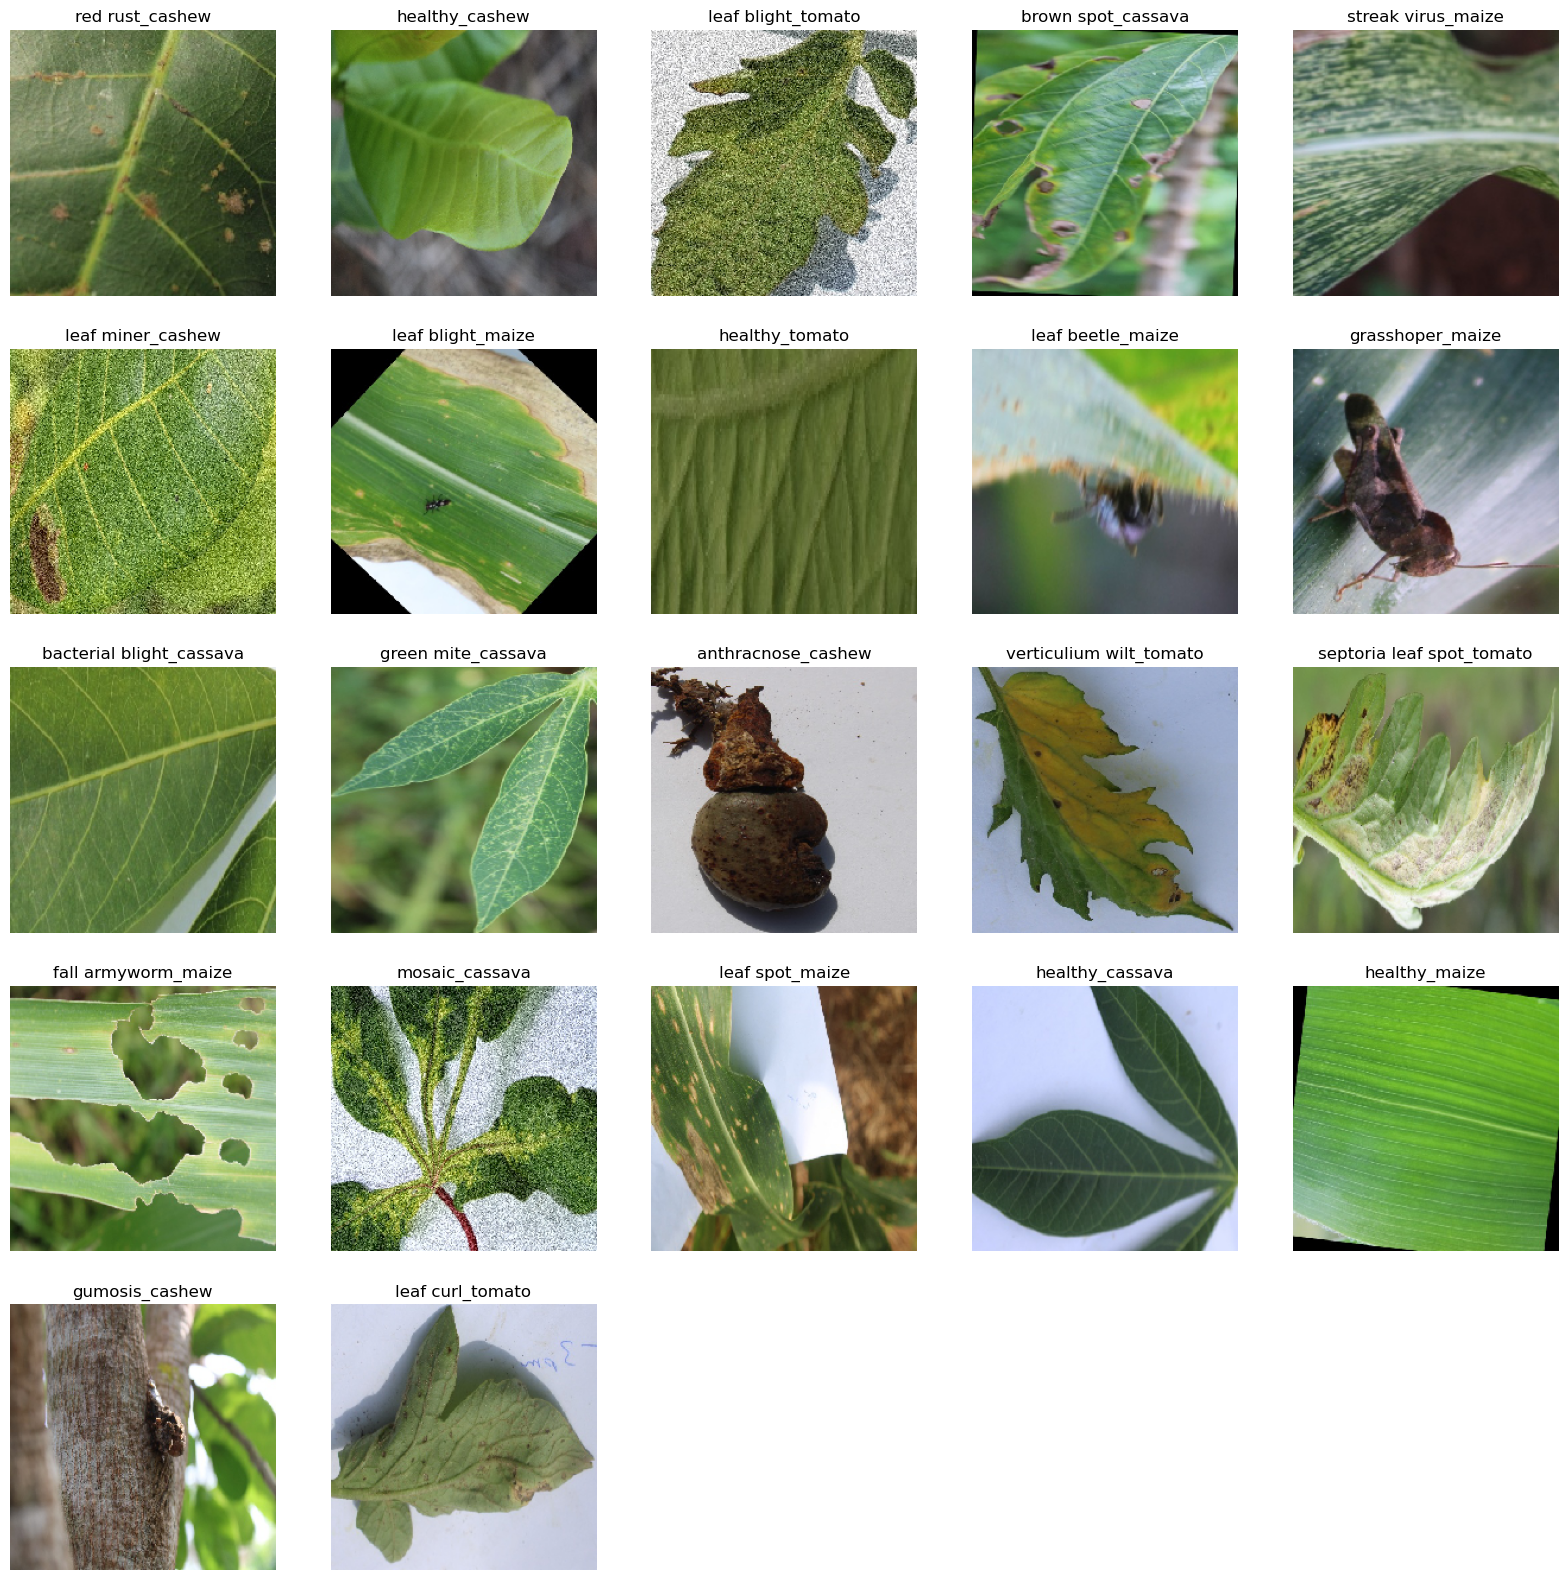

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Fetch class names and their indices
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Function to display one image per class
def display_one_image_per_class(train_generator, class_names):
    plt.figure(figsize=(20, 20))
    displayed_classes = set()

    # Loop through the batches until we get an image of each class
    for images, labels in train_generator:
        for i in range(images.shape[0]):
            label_index = np.argmax(labels[i])
            class_name = class_names[label_index]

            if class_name not in displayed_classes:
                plt.subplot(5, 5, len(displayed_classes) + 1)
                plt.imshow(images[i])
                plt.title(class_name)
                plt.axis('off')
                displayed_classes.add(class_name)

            if len(displayed_classes) == len(class_names):
                plt.show()
                return

# Call the function to display the images
display_one_image_per_class(train_generator, class_names)
